**Import Data**

In [1]:
# import appropriate packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 

In [2]:
# read the excel file
# had to install the xlrd package to read the file 
df = pd.read_csv("../csv_files/p2zscorex.csv", index_col=0)
df.head(10)

,C1,C3,C4,C5,C6,C7,T1,T2,T3,T4,...,S3,C5p,LongSentences,RealWords,LongWords,PositiveWords,NegativeWords,UncertainWords,C2,C3p
0,0.030756,0.712586,0.669243,0.349506,0.343380,-0.477847,0.131093,0.103796,0.147542,0.165663,...,0.089906,0.056127,0.168742,0.385070,0.310826,-0.146970,0.165628,-0.128062,1.0,0
1,1.279824,0.178082,-0.643726,-0.089084,-1.645602,-0.789310,1.873545,1.676347,1.703068,1.745347,...,1.480823,2.434275,0.229402,0.151494,-0.016168,-1.240880,0.781633,-0.147676,0.0,1
2,-0.431183,0.018615,0.410546,-0.764364,-0.662792,-1.277684,-1.897061,-1.712308,-1.691699,-1.656026,...,-1.864154,-0.231083,0.118150,0.395935,1.107680,2.767209,-0.974221,0.044649,1.0,1
3,0.907828,-0.143574,0.389135,-0.922547,-0.803873,-1.226569,-0.833698,-0.884595,-0.835244,-1.055272,...,-0.482106,-0.274697,-1.243939,0.572453,1.094210,2.091907,-0.602916,0.697829,1.0,1
4,-0.603838,-0.733255,-1.310426,-0.010303,0.007764,1.026514,0.735870,0.509990,0.496230,0.461735,...,0.554405,-0.020075,-0.574282,-0.085718,-0.357465,-0.364704,0.449384,-0.006421,1.0,0
5,-0.366577,-0.742811,-2.011735,0.392844,-0.136494,0.251215,0.375405,1.068821,0.652392,0.395476,...,0.762689,0.879085,0.206749,-2.820805,-0.771004,-1.098306,-1.414049,-0.459496,1.0,0
6,0.105821,0.270830,-0.103473,-0.610403,-0.535168,-1.399794,0.284951,0.679347,0.656251,0.805094,...,0.017303,-0.173474,1.923966,-0.155688,-0.900494,0.044674,-0.776387,-1.072578,1.0,1
7,-0.414811,-0.238439,1.026552,-0.589211,-0.033441,-0.117310,-0.789119,-0.204270,-0.199637,-0.056510,...,-0.231744,-0.922803,2.774601,0.083466,-7.097014,-0.132267,0.653746,-0.150614,0.0,1
8,-0.273839,-0.382719,-1.137778,0.672072,0.392980,0.467093,1.001696,0.506839,0.555873,0.453496,...,1.446154,0.517455,-1.234290,0.384780,1.121892,-0.760025,-0.128609,1.455401,1.0,1
9,-0.185627,0.126291,-1.001893,0.101994,0.392980,0.849215,-0.425299,-0.672789,-0.690855,-0.823741,...,0.230038,-0.434966,-1.599220,-0.106745,-0.151382,1.774581,0.385979,1.540672,1.0,0


In [3]:
# read in y variables csv 
dfy = pd.read_csv('../csv_files/y.csv', index_col=0)
dfy.head()

,pIPO,pH,pL,p1day,Pmid,Y1,Y2,C6p
0,10.0,9.5,8.5,11.870000,9.0,0,1,11.111111
1,8.0,10.0,8.0,7.250000,9.0,1,0,0.000000
2,7.0,14.0,12.0,6.700000,13.0,1,0,0.000000
3,11.5,16.0,14.0,12.390000,15.0,1,1,0.000000
4,21.0,21.0,19.0,56.599998,20.0,0,1,5.000000


In [4]:
# filter our target variables Y1 nad Y2 
dfy = dfy.filter(['Y1', 'Y2'])
dfy.head()

,Y1,Y2
0,0,1
1,1,0
2,1,0
3,1,1
4,0,1


In [5]:
# concat df with dfy 
df = pd.concat([df, dfy], axis=1)
df.head()

,C1,C3,C4,C5,C6,C7,T1,T2,T3,T4,...,LongSentences,RealWords,LongWords,PositiveWords,NegativeWords,UncertainWords,C2,C3p,Y1,Y2
0,0.030756,0.712586,0.669243,0.349506,0.343380,-0.477847,0.131093,0.103796,0.147542,0.165663,...,0.168742,0.385070,0.310826,-0.146970,0.165628,-0.128062,1.0,0,0,1
1,1.279824,0.178082,-0.643726,-0.089084,-1.645602,-0.789310,1.873545,1.676347,1.703068,1.745347,...,0.229402,0.151494,-0.016168,-1.240880,0.781633,-0.147676,0.0,1,1,0
2,-0.431183,0.018615,0.410546,-0.764364,-0.662792,-1.277684,-1.897061,-1.712308,-1.691699,-1.656026,...,0.118150,0.395935,1.107680,2.767209,-0.974221,0.044649,1.0,1,1,0
3,0.907828,-0.143574,0.389135,-0.922547,-0.803873,-1.226569,-0.833698,-0.884595,-0.835244,-1.055272,...,-1.243939,0.572453,1.094210,2.091907,-0.602916,0.697829,1.0,1,1,1
4,-0.603838,-0.733255,-1.310426,-0.010303,0.007764,1.026514,0.735870,0.509990,0.496230,0.461735,...,-0.574282,-0.085718,-0.357465,-0.364704,0.449384,-0.006421,1.0,0,0,1


**Correlation**

In [6]:
#Want to see the correlation of every variable using the Spearman method 
df.corr(method='spearman')

,C1,C3,C4,C5,C6,C7,T1,T2,T3,T4,...,LongSentences,RealWords,LongWords,PositiveWords,NegativeWords,UncertainWords,C2,C3p,Y1,Y2
C1,1.000000,0.037293,0.091368,0.050252,0.002052,0.069191,0.140925,0.140647,0.151029,0.132417,...,0.047803,-0.059528,0.043663,0.024783,0.044012,-0.032842,-0.000499,-0.014788,0.046977,-0.009851
C3,0.037293,1.000000,0.010623,-0.115628,-0.122202,-0.043115,-0.165602,-0.169401,-0.154937,-0.168996,...,-0.085956,0.089876,0.142465,0.133128,0.093092,0.107320,0.016333,0.301838,0.216707,-0.012247
C4,0.091368,0.010623,1.000000,-0.017844,0.010170,0.013566,0.001410,0.015173,0.024225,0.021565,...,0.083078,0.052211,0.052359,0.000544,0.000239,0.035953,-0.031415,0.011202,-0.069012,0.097813
C5,0.050252,-0.115628,-0.017844,1.000000,0.759087,0.456547,0.494107,0.507526,0.506746,0.515921,...,0.228254,-0.001297,0.064804,0.052019,0.119054,-0.078234,0.432822,-0.118514,-0.078343,0.032065
C6,0.002052,-0.122202,0.010170,0.759087,1.000000,0.533063,0.451795,0.445150,0.448309,0.458936,...,0.179739,-0.065951,-0.030346,0.050473,0.159183,-0.118301,0.401305,-0.164084,-0.038046,-0.008882
C7,0.069191,-0.043115,0.013566,0.456547,0.533063,1.000000,0.360849,0.340456,0.332778,0.360869,...,0.133239,-0.190912,-0.176590,0.084362,0.179652,-0.160773,0.210420,-0.338894,-0.037328,-0.031607
T1,0.140925,-0.165602,0.001410,0.494107,0.451795,0.360849,1.000000,0.932112,0.939496,0.944345,...,0.195183,-0.060431,-0.056928,-0.012771,0.166574,-0.232624,0.207737,-0.105035,0.012892,-0.019916
T2,0.140647,-0.169401,0.015173,0.507526,0.445150,0.340456,0.932112,1.000000,0.967923,0.963185,...,0.426622,-0.105893,-0.068219,0.007302,0.147645,-0.214873,0.204534,-0.086821,0.022768,-0.004766
T3,0.151029,-0.154937,0.024225,0.506746,0.448309,0.332778,0.939496,0.967923,1.000000,0.970180,...,0.425550,-0.040058,-0.047841,0.012481,0.138209,-0.210291,0.204339,-0.080309,0.035801,-0.021690
T4,0.132417,-0.168996,0.021565,0.515921,0.458936,0.360869,0.944345,0.963185,0.970180,1.000000,...,0.465571,-0.081503,-0.078281,0.002920,0.131136,-0.221264,0.210689,-0.100167,0.020630,-0.016502


In [7]:
#Testing to see which variables are highly correlated to our target variables (Y1 & Y2)
##Highly correlated being > 0.5
Target_1 = df.corr(method='spearman')['Y1'] > 0.5
Target_1

C1                False
C3                False
C4                False
C5                False
C6                False
C7                False
T1                False
T2                False
T3                False
T4                False
T5                False
S1                False
S2                False
S3                False
C5p               False
LongSentences     False
RealWords         False
LongWords         False
PositiveWords     False
NegativeWords     False
UncertainWords    False
C2                False
C3p               False
Y1                 True
Y2                False
Name: Y1, dtype: bool

In [8]:
#Testing to see which variables are highly correlated to our target variables (Y1 & Y2)
##Highly correlated being > 0.5
Target_2 = df.corr(method='spearman')['Y2'] > 0.5
Target_2

C1                False
C3                False
C4                False
C5                False
C6                False
C7                False
T1                False
T2                False
T3                False
T4                False
T5                False
S1                False
S2                False
S3                False
C5p               False
LongSentences     False
RealWords         False
LongWords         False
PositiveWords     False
NegativeWords     False
UncertainWords    False
C2                False
C3p               False
Y1                False
Y2                 True
Name: Y2, dtype: bool

**Correlation Heatmap**

Text(0.5, 1.0, 'Correlation Heatmap')

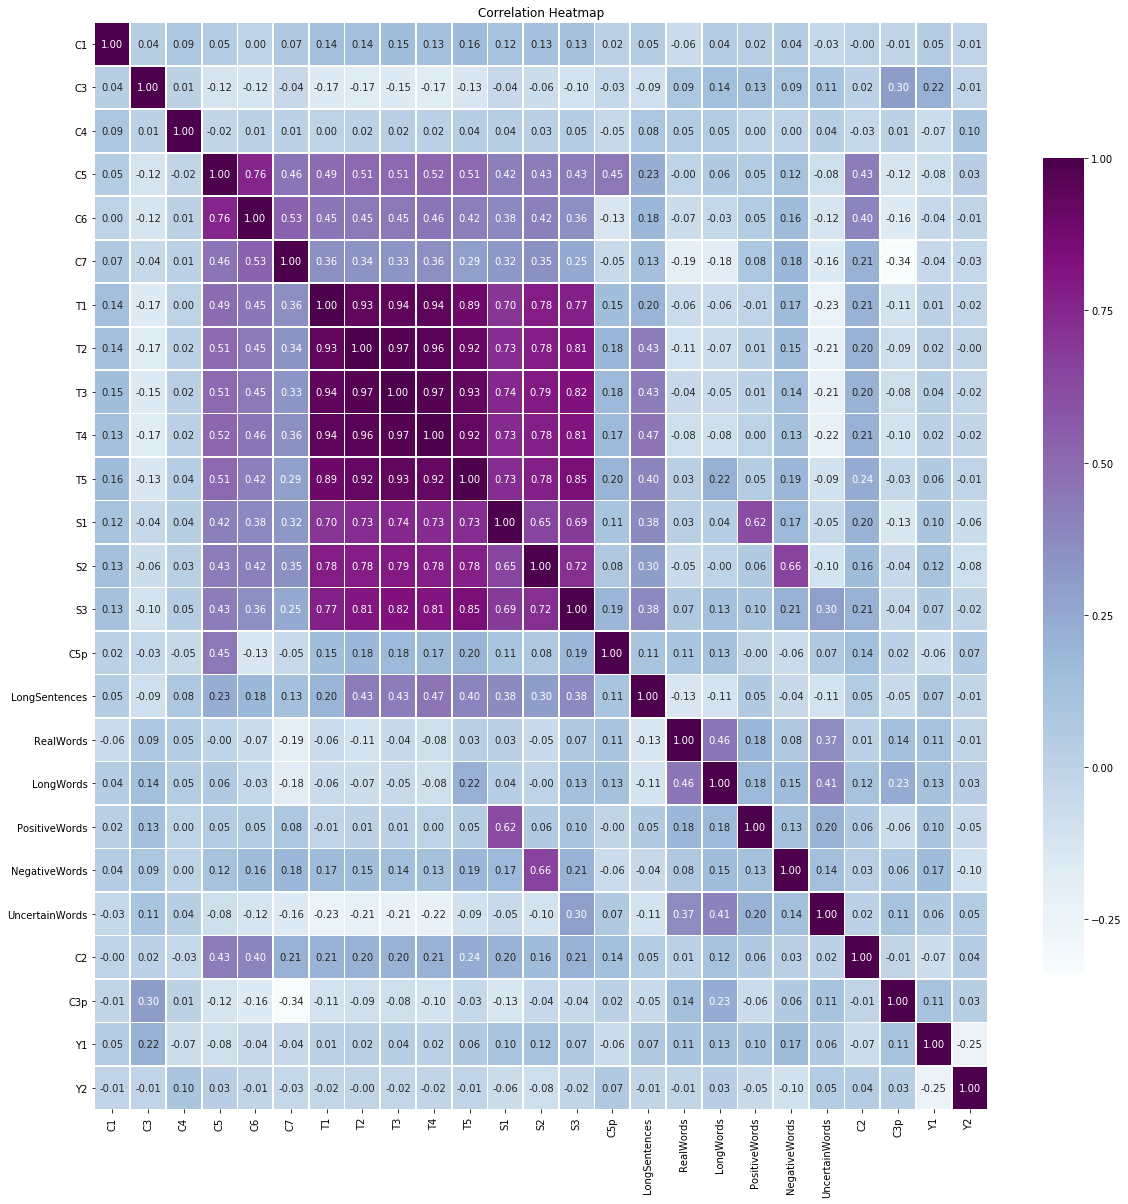

In [9]:
#Created a figure and are able to adjust the size of the graph
plt.figure(figsize = (20,20))
#Created a heatmap using Seaborn to display the correlation based on 'Spearman' method
##Added the annotation so that the numbers appear in each box
display = sns.heatmap(df.corr(method = 'spearman'), annot=True, fmt='.2f', cmap='BuPu', linewidth=.75, cbar_kws={'shrink': .75})
#Created a title
plt.title('Correlation Heatmap')

In [10]:
#Dropped columns that were very highly correlated to each other (i.e. correlation > 0.5). 
##Kept one of each of the highly correlated variable
df = df.drop(columns = ['T1', 'T2', 'T3', 'T4', 'S1', 'S2', 'C5'], axis=1)

Text(0.5, 1.0, 'Correlation Heatmap')

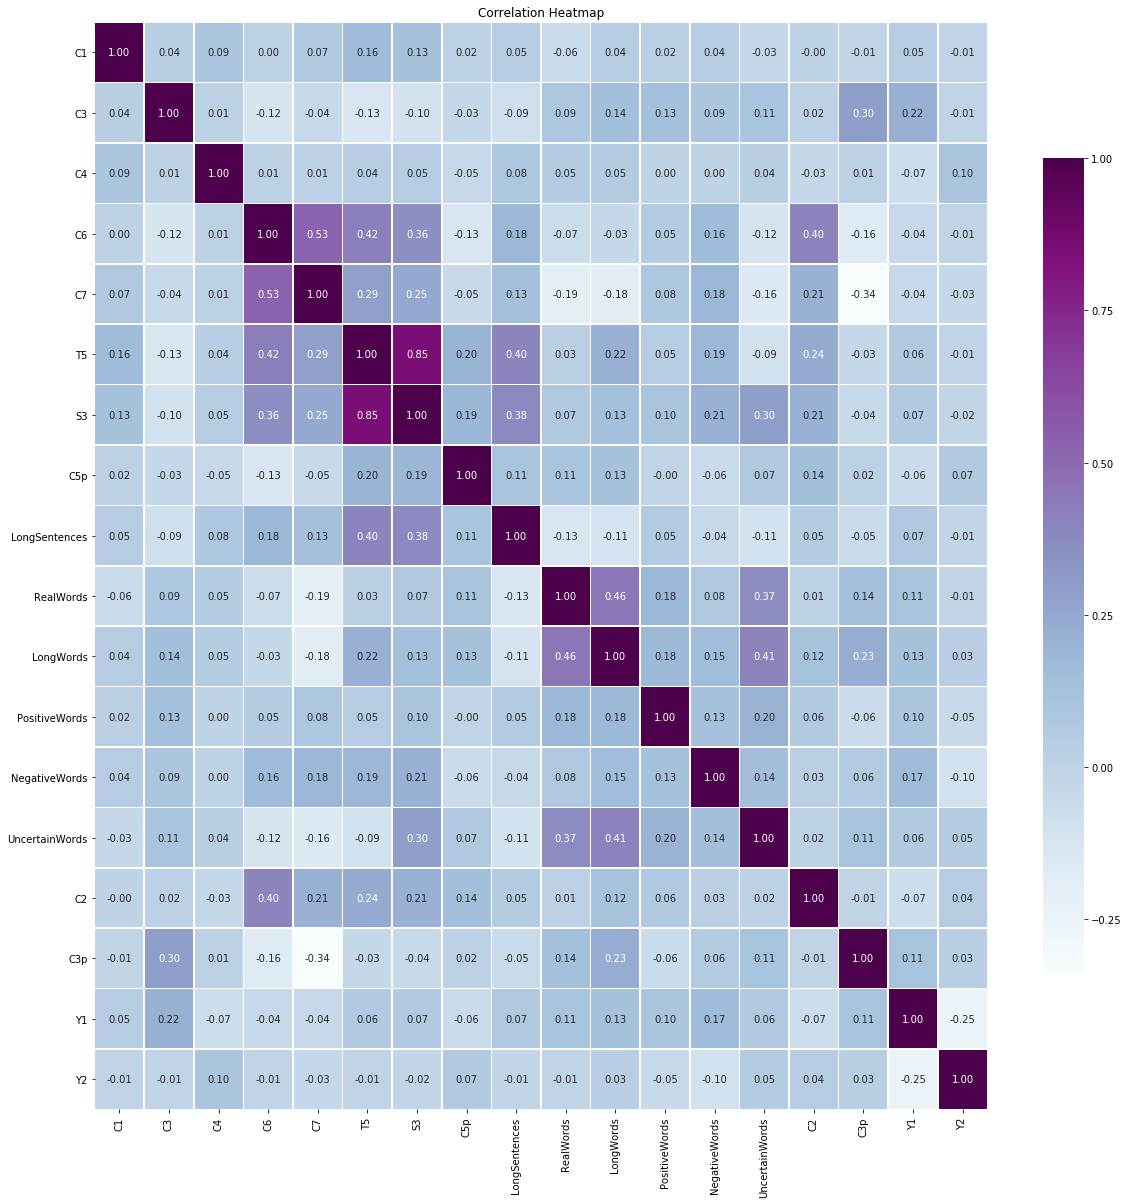

In [11]:
#Recreated our heatmap to see how the chart is different 
#Created a figure and are able to adjust the size of the graph
plt.figure(figsize = (20,20))
#Created a heatmap using Seaborn to display the correlation based on 'Spearman' method
##Added the annotation so that the numbers appear in each box
display = sns.heatmap(df.corr(method = 'spearman'), annot=True, fmt='.2f', cmap='BuPu', linewidth=.75, cbar_kws={'shrink': .75})
#Created a title
plt.title('Correlation Heatmap')

In [13]:
df.to_csv('../csv_files/p2correlation.csv')